# Gold mining yield at Zyfra company

By: Esther Weinstock

Zyfra company develops efficiency solutions for heavy industry. Here, the company presents the separation steps required when mining gold that involves a number of separation processes at the end of which gravel is obtained with a high percentage of gold.

Separation processes: 
1. The gravel which is composed of different types of metals enters the process of flutation. This process is based on the density of the metals in which the gravel is put into a heavy water solution and any material whose density is higher than the solution sinks, and the materials whose density is lower than the solution float above it and then exit through the tail. The precipitated substances are called rougher concntrate and they continue to two purification processes.
2. The rougher concentarte undergoes two purification processes in which the goal is to increase the gold concentration by filtering the other metals. After this process the final concentration is obtained.

The purpose of the project is to repare a prototype of a machine learning model for Zyfra. The model should predict the amount of gold recovered from gold ore using data on extraction and purification. The model will help to optimize the production and eliminate unprofitable parameters.

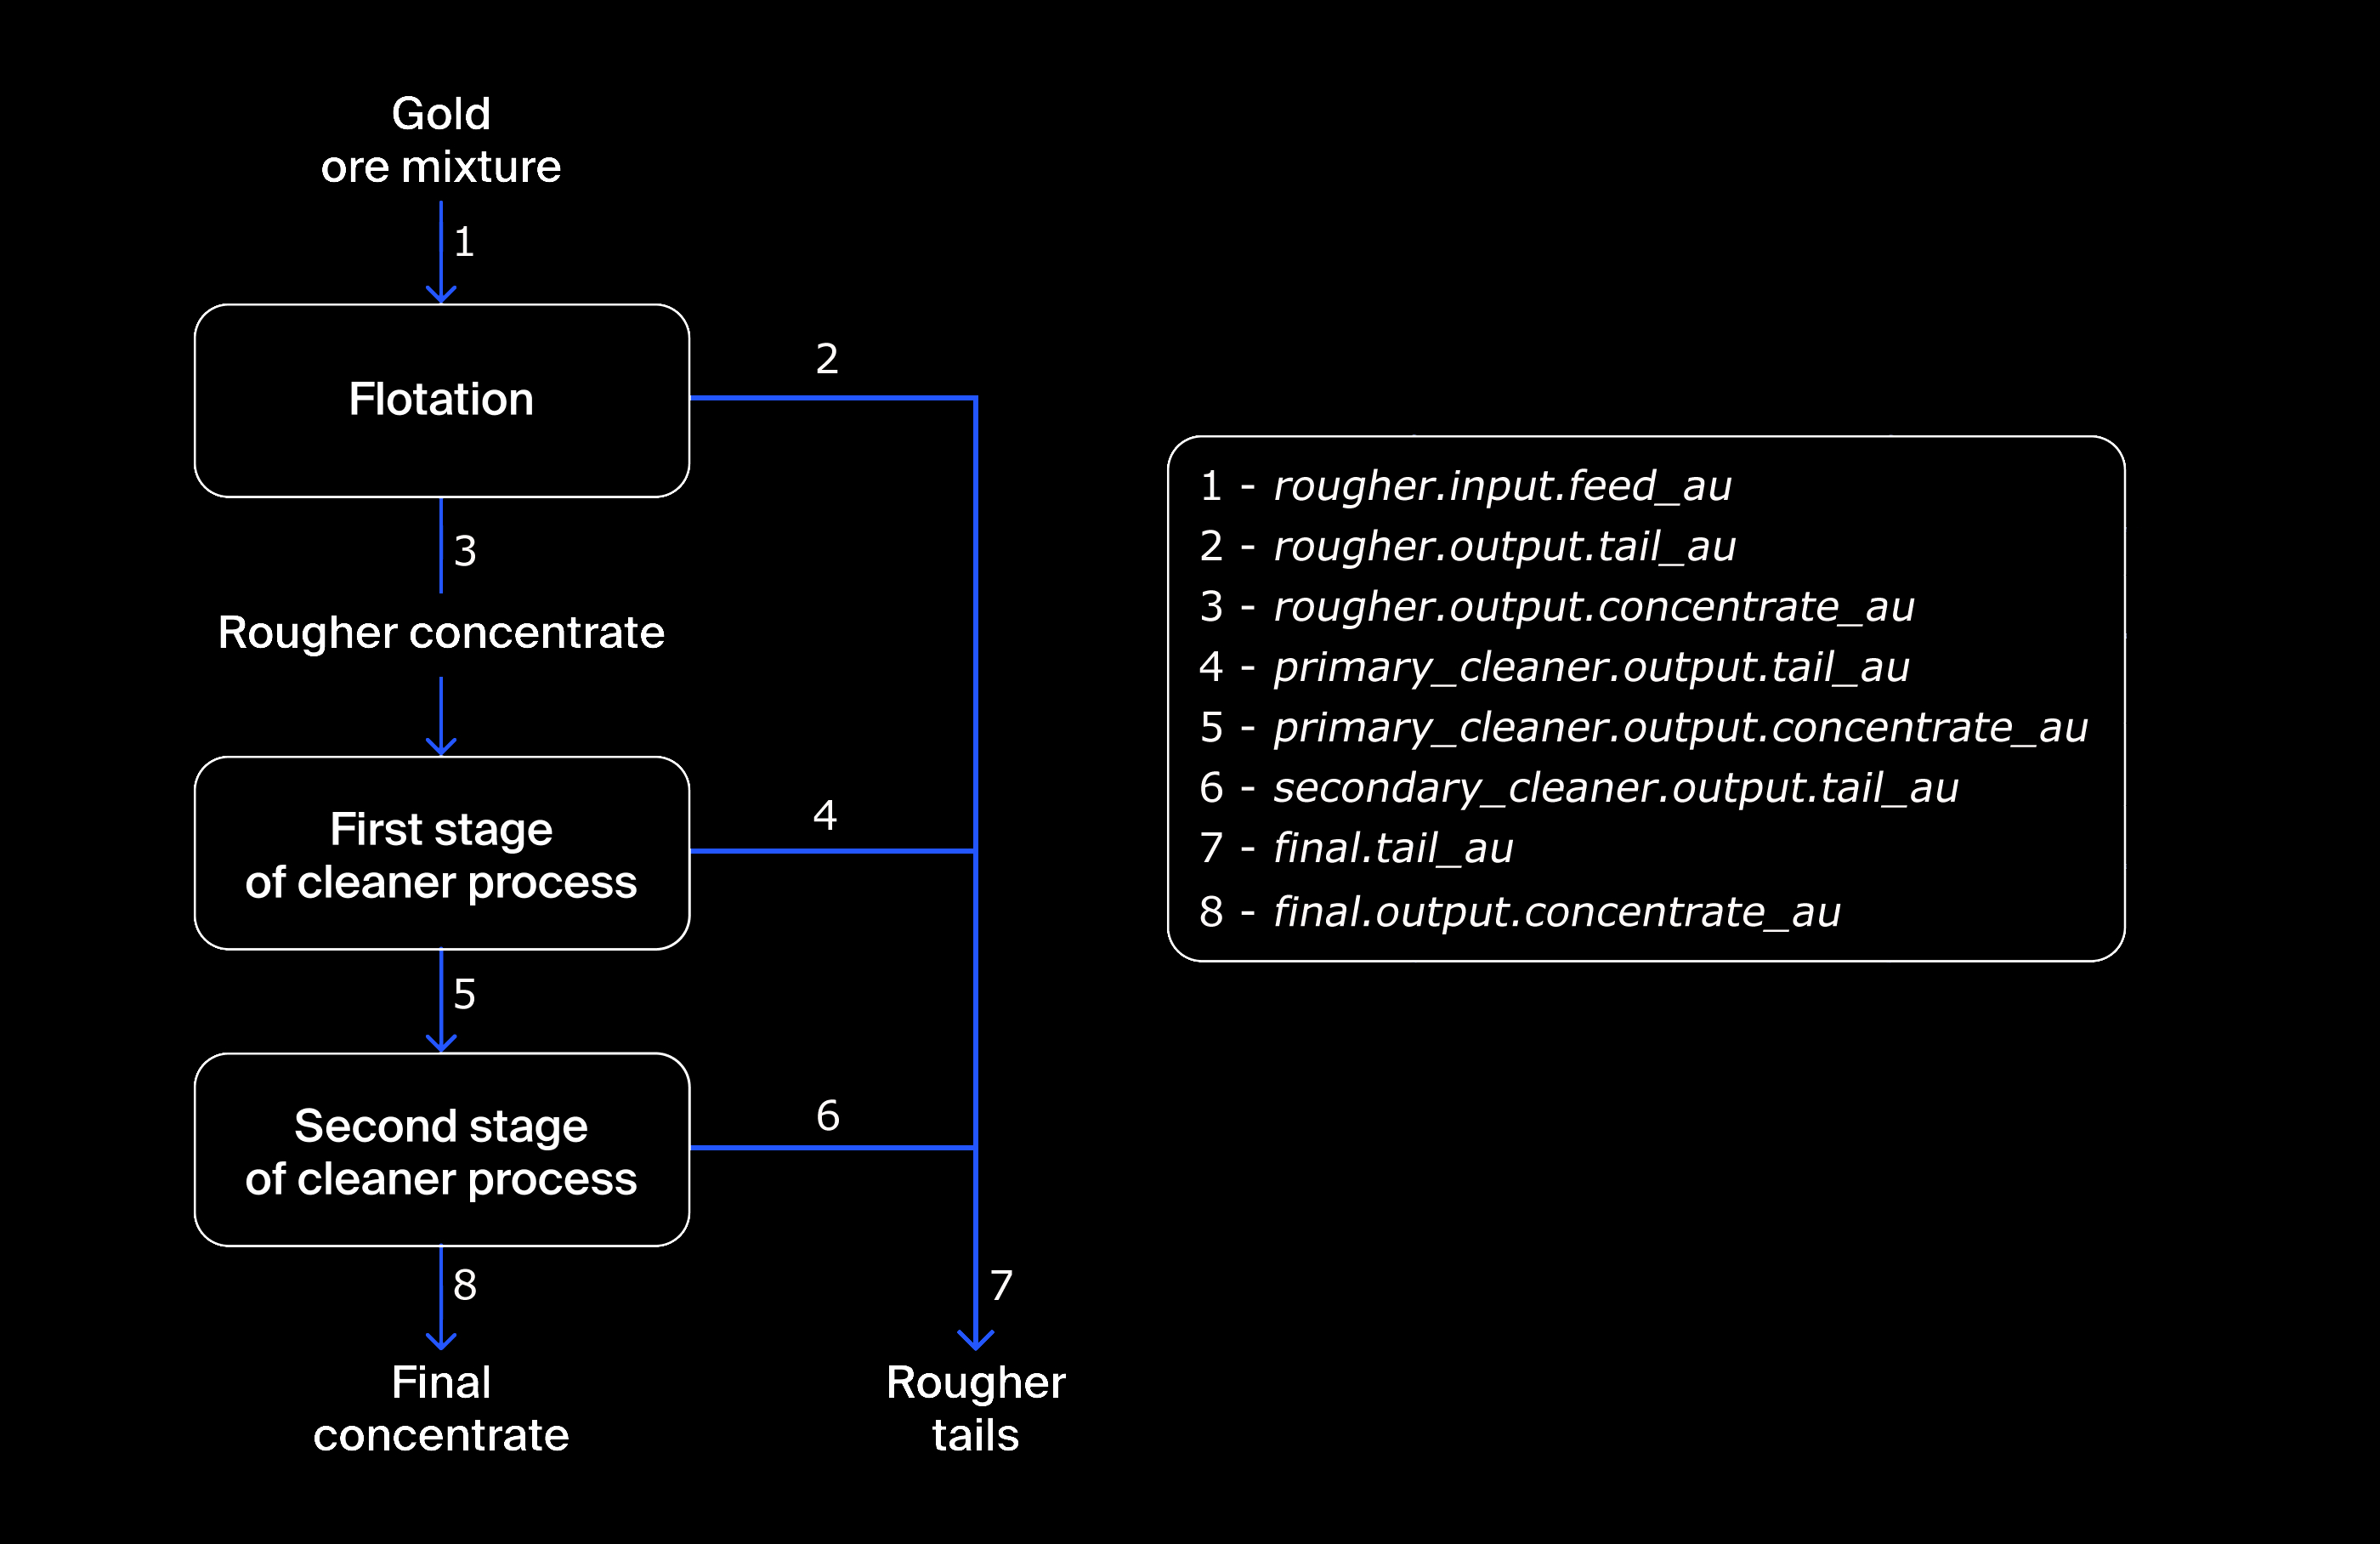

In [1]:
from IPython.display import Image
Image('ore_1591699963.jpg')

In [2]:
#import libraries that required to the project:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
print(sklearn.__version__)

1.0


**Table of Contents:**
<h1>Table of Contents<span class="tocSkip"></span></h1>

* [Prepare the data](#chapter1)
    * [Open the files and look into the data](#section_1_1)
    * [Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings](#section_1_2)
    * [Analyze the features not available in the test set](#section_1_3)
    * [Perform data preprocessing](#section_1_4)
* [Analyze the data](#chapter2)
    * [Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage](#section_2_1)
    * [Compare the feed particle size distributions in the training set and in the test set](#section_2_2)
    * [Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate](#section_2_3)
        * [Remove outliers](#subsection_2_3_1)
* [Build the model](#chapter3)
    * [Write a function to calculate the final sMAPE value](#section_3_1)
    * [Train different models using pipeline and cross-validation](#section_3_2)
        * [DecisionTreeRegressor](#subsection_3_2_1)
        * [LinearRegression](#subsection_3_2_2)
        * [RandomForestRegressor](#subsection_3_2_3)
        * [Lasso](#subsection_3_2_4)
        * [KNeighborsRegressor](#subsection_3_2_5)
        * [models comparisom](#subsection_3_2_6)
        * [Dummy test](#subsection_3_2_7)
* [Conclusion](#chapter4)

## Prepare the data <a class="anchor" id="chapter1"></a>

### Open the files and look into the data. <a class="anchor" id="section_1_1"></a>

In [4]:
try:
    train=pd.read_csv('gold_recovery_train.csv')
    test=pd.read_csv('gold_recovery_test.csv')
    full=pd.read_csv('gold_recovery_full.csv')
except:
    train=pd.read_csv('/datasets/gold_recovery_train.csv')
    test=pd.read_csv('/datasets/gold_recovery_test.csv')
    full=pd.read_csv('/datasets/gold_recovery_full.csv')

In [5]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

The data contains:

Features:
* `rougher input` - The substances that enter the flutation process: ag (silver), pb (lead), au (gold), sol (solution - liquid, probably of water), and reagents like xanthate, sulphate, depressant for creating heavy water.
* `rougher state` - The substances that are inside the flutation and their amount does not change throughout the process, for example a constant air flow that aims to drive the process.
* `rougher output` - The substances that come out after the flutation process, their concentration should be higher than the concentration at the entrance to the fultation process.
* `prinary and secondary cleaner input` - The substances that enter the purification process after leaving the flutation process.

Targets:
* `rougher.output.recovery` - Yield of gold after the flutation process
* `final.output.recovery` - Yield of gold after the purification processes

### Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values <a class="anchor" id="section_1_2"></a>

Recovery calculation shows the gold utilization obtained after the filtration processes:

${\displaystyle {\text{recovery}}={\frac {C\cdot (F-T)}{F\cdot (C-T)}}}$

When:
* C - share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)
* F - share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)
* T - share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

In [6]:
#define the parameters C, F, T
c = train['rougher.output.concentrate_au']
f = train['rougher.input.feed_au']
t = train['rougher.output.tail_au']

In [7]:
#calculate the rougher.output.recovery
train['rougher.output.recovery_calculation'] = (c*(f-t))/(f*(c-t))*100

In [8]:
#calculate mean absolut error
mae = (train['rougher.output.recovery_calculation']-train['rougher.output.recovery']).abs().sum()/len(full)
print('Mean absolut error between rougher.output.recovery_calculation and rougher.output.recovery is:', mae)

Mean absolut error between rougher.output.recovery_calculation and rougher.output.recovery is: 5.8512897917577064e-15


A very low error was received and this means that the calculation made in the original data is correct.

### Analyze the features not available in the test set <a class="anchor" id="section_1_3"></a>

In [9]:
#Check which columns in train are not in target
pd.Series(train.columns[~train.columns.isin(test.columns)])

0                           final.output.concentrate_ag
1                           final.output.concentrate_pb
2                          final.output.concentrate_sol
3                           final.output.concentrate_au
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_pb
7                                 final.output.tail_sol
8                                  final.output.tail_au
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_pb
11               primary_cleaner.output.concentrate_sol
12                primary_cleaner.output.concentrate_au
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_pb
15                      primary_cleaner.output.tail_sol
16                       primary_cleaner.output.tail_au
17        rougher.calculation.sulfate_to_au_conc

It can be seen that all the columns that are output are not included in the test since the purpose of the model is to discover these values because they are values obtained in the purification processes, compared to the input values which are the values required to know their quantity.

However, the model cannot be trained without targets and therefore it is necessary to add the targets to the test. And in addition remove from train data the columns that do not exist in the test data.

In [10]:
#take the targets fron the full data
full_merge = full[['date', 'rougher.output.recovery', 'final.output.recovery']]

#merge the targets to test data
test=test.merge(full_merge, on='date', how='left')

In [11]:
#remove from train data the columns that do not exist in the test data 
train_1=train.loc[:, list(test.columns)]

### Perform data preprocessing. <a class="anchor" id="section_1_4"></a>

In [12]:
#check missing values
print('Sum of NaN in train: ', train.isnull().any(axis=1).sum())
print('Sum of NaN in test: ', test.isnull().any(axis=1).sum())

Sum of NaN in train:  5843
Sum of NaN in test:  627


In [13]:
#check duplicates values
print('Sum of duplicates in train: ', train.duplicated().sum())
print('Sum of duplicates in test: ', test.duplicated().sum())

Sum of duplicates in train:  0
Sum of duplicates in test:  0


In [14]:
#remove missing values from the targets
train_1 = train_1.dropna(subset=['final.output.recovery','rougher.output.recovery'])
test = test.dropna(subset=['final.output.recovery','rougher.output.recovery'])

In [15]:
#fill the rest missing values using ffill method
train_1.fillna(method='ffill',inplace=True)
test.fillna(method='ffill',inplace=True)

## Analyze the data <a class="anchor" id="chapter2"></a>

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.  <a class="anchor" id="section_2_1"></a>

In [16]:
yield_au = train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
                 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
yield_ag = train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
                 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
yield_pb = train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
                 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

In [17]:
def metal_conc(yield_metal, name):
    plt.figure(figsize=(12,7))
    bins = np.linspace(0, 55, 100)

    plt.hist(yield_metal.iloc[:,0], bins, alpha=0.5, label=yield_metal.columns[0])
    plt.hist(yield_metal.iloc[:,1], bins, alpha=0.5, label=yield_metal.columns[1])
    plt.hist(yield_metal.iloc[:,2], bins, alpha=0.5, label=yield_metal.columns[2])
    plt.hist(yield_metal.iloc[:,3], bins, alpha=0.5, label=yield_metal.columns[3])

    plt.xlabel(name + ' concentration%')
    plt.ylabel('count')
    plt.title(name.upper() + ' Concentration')
    plt.legend()
    plt.show()
    
    return

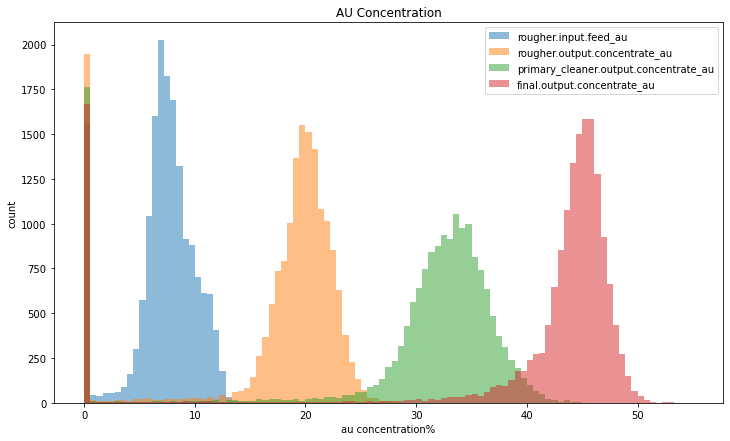

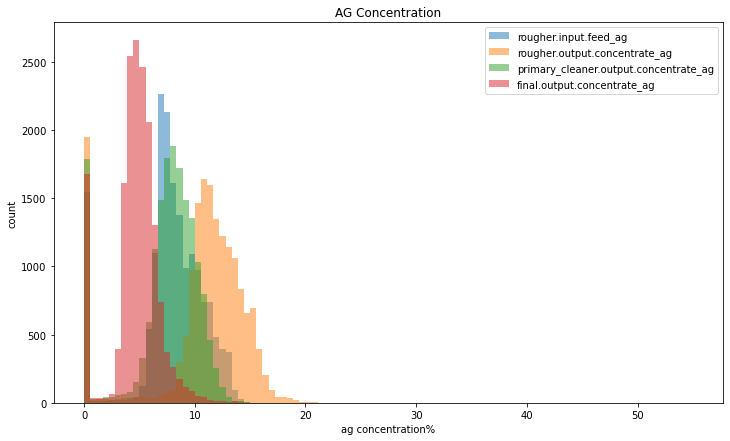

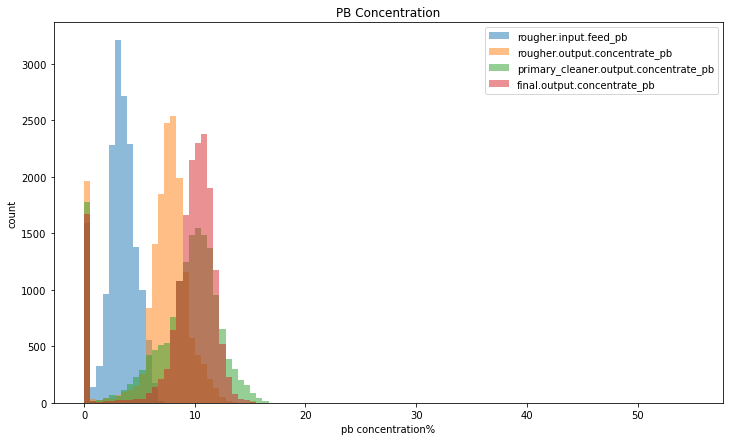

In [18]:
yields = [yield_au, yield_ag, yield_pb]
metals = ['au', 'ag', 'pb']
for i,j in zip(yields, metals):
    metal_conc(i, j)

From the concentrations obtained for each metal, it can be seen that for the gold, as the purification process progresses the concentration of the gold increases (and this is the goal). In contrast, the concentration of silver decreases and this makes sense since the density of silver is significantly lower than gold and lead and since the separation process is based on density, the concentration of the silver will decrease as the separation process progresses. As for the lead, until the purification process the concentration increases and then it stops, that is, the purification process is specifically designed to separate gold.

### Compare the feed particle size distributions in the training set and in the test set. <a class="anchor" id="section_2_2"></a>

If the distributions vary significantly, the model evaluation will be incorrect.

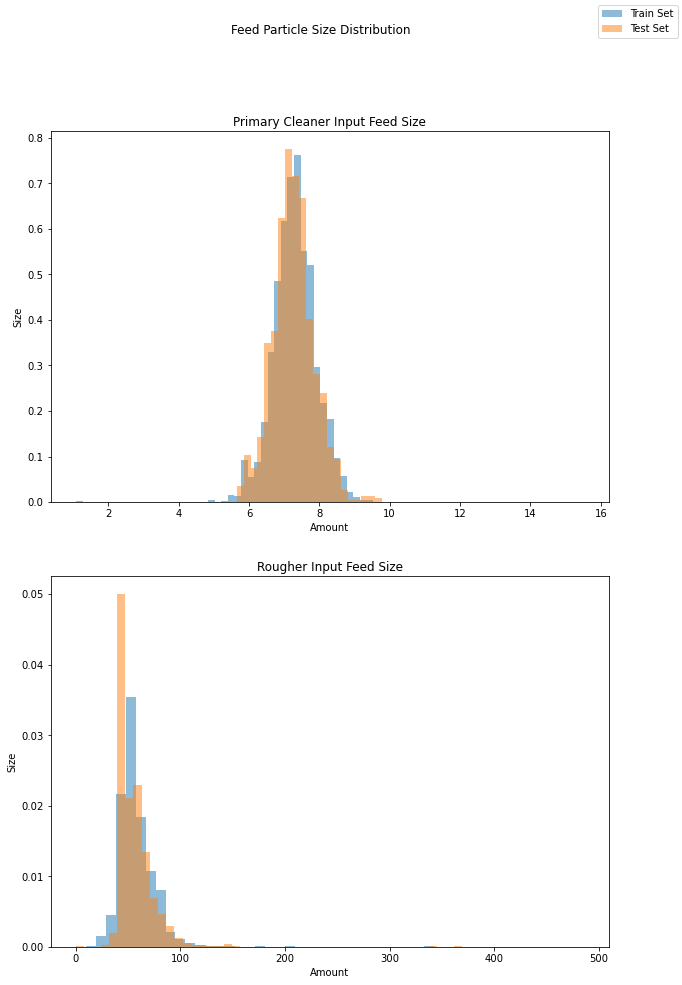

In [19]:
fig, axes = plt.subplots(2,1, figsize=(10, 15))
axes[0].hist(train["primary_cleaner.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[0].hist(test["primary_cleaner.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[0].set(title="Primary Cleaner Input Feed Size", xlabel="Amount", ylabel="Size")

axes[1].hist(train["rougher.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[1].hist(test["rougher.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[1].set(title="Rougher Input Feed Size", xlabel="Amount", ylabel="Size")
fig.suptitle("Feed Particle Size Distribution")
fig.legend(["Train Set", "Test Set"])
fig.show()

The distribution of the feed particle size for train set and test set is quite similar and therefore the model can be biulded using these datasets.

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. <a class="anchor" id="section_2_3"></a>

In [20]:
def raw_feed(data):
    raw_feed=data['rougher.input.feed_au']+data['rougher.input.feed_pb']+data['rougher.input.feed_ag']
    return raw_feed

def rougher_concentrate(data):
    rougher_concentrate=data['rougher.output.concentrate_au']+data['rougher.output.concentrate_pb']+data['rougher.output.concentrate_ag']
    return rougher_concentrate

def final_concentrate(data):
    final_concentrate=data['final.output.concentrate_au']+data['final.output.concentrate_pb']+data['final.output.concentrate_ag']
    return final_concentrate

In [21]:
data={'total_raw_feed':raw_feed(full), 
      'total_rougher_concentrate':rougher_concentrate(full), 
      'total_final_concentrate':final_concentrate(full)}
total_con_stages=pd.DataFrame(data)
total_con_stages.head()

,total_raw_feed,total_rougher_concentrate,total_final_concentrate
0,14.871440,38.395653,58.137072
1,14.905729,38.945647,58.699942
2,14.638299,38.649756,58.927421
3,14.199305,38.411473,58.714815
4,13.511497,38.867359,59.065251


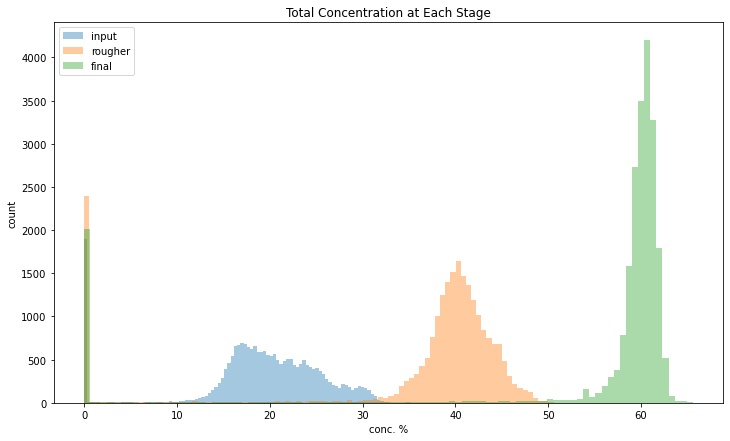

In [22]:
fig = plt.figure(figsize=(12, 7))
for column in list(total_con_stages):
    sns.distplot(total_con_stages[column], bins=100, kde=False)
plt.legend(['input', 'rougher', 'final'])
plt.title('Total Concentration at Each Stage')
plt.xlabel('conc. %')
plt.ylabel('count')
fig.show()

The sets contain outliers values, especially those whose sum is up to 10. Therefore we will remove them so that the model built will be more accurate.

#### Remove outliers <a class="anchor" id="subsection_2_3_1"></a>

In [23]:
#remove values (feed_au + feed_ag + feed_pb) whose amount smaller than 10
full_without_outlier=full.loc[(full[['rougher.input.feed_au', 'rougher.input.feed_pb', 
                                     'rougher.input.feed_ag']].sum(axis=1)>10)
                              &(full[['rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 
                                      'rougher.output.concentrate_ag']].sum(axis=1)>10)
                              &(full[['final.output.concentrate_au', 'final.output.concentrate_pb',
                                      'final.output.concentrate_ag']].sum(axis=1)>10)]

In [24]:
#data without outliers
data_without_outlier={'total_raw_feed':raw_feed(full_without_outlier), 
                      'total_rougher_concentrate':rougher_concentrate(full_without_outlier), 
                      'total_final_concentrate':final_concentrate(full_without_outlier)}
total_con_stages_2=pd.DataFrame(data_without_outlier)
total_con_stages_2.head()

,total_raw_feed,total_rougher_concentrate,total_final_concentrate
0,14.871440,38.395653,58.137072
1,14.905729,38.945647,58.699942
2,14.638299,38.649756,58.927421
3,14.199305,38.411473,58.714815
4,13.511497,38.867359,59.065251


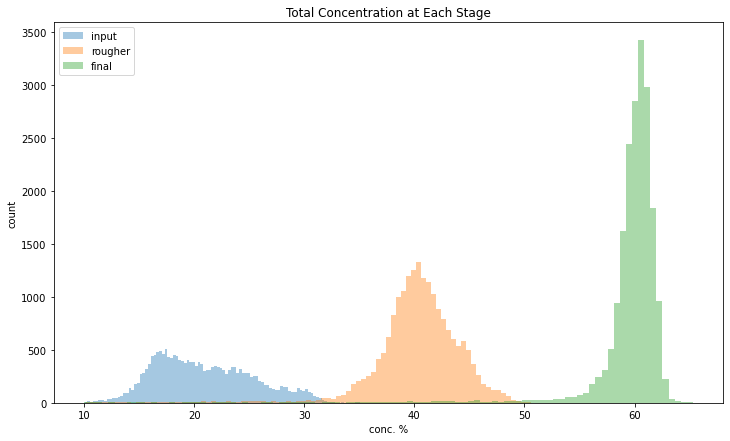

In [25]:
#show the total concentration again without outliers
fig = plt.figure(figsize=(12, 7))
for column in list(total_con_stages_2):
    sns.distplot(total_con_stages_2[column], bins=100, kde=False)
plt.legend(['input', 'rougher', 'final'])
plt.title('Total Concentration at Each Stage')
plt.xlabel('conc. %')
plt.ylabel('count')
fig.show()

In [26]:
#remove the outliers from train set and test set
train_1=train_1.loc[train_1['date'].isin(full_without_outlier['date'])].reset_index(drop=True)
test=test.loc[test['date'].isin(full_without_outlier['date'])].reset_index(drop=True)

## Build the model <a class="anchor" id="chapter3"></a>

### Write a function to calculate the final sMAPE (Symmetric Mean Absolute Percentage Erro) value. <a class="anchor" id="section_3_1"></a>

This function (sMAPE) will be used to evaluate the model. The smaller the error, the greater the model for predicting the gold concentration.

 
${\displaystyle {\text{sMAPE}}={\frac {100\%}{n}}\sum _{i=1}^{n}{\frac {\left|y_{i}-ŷ_{i}\right|}{(|y_{i}|+|ŷ_{i}|)/2}}}$


Denotation:
* ${\displaystyle {y_{i}}}$ - Value of target for the observation with the i index in the sample used to measure quality.
* ${\displaystyle {ŷ_{i}}}$ - Value of prediction for the observation with the i index, for example, in the test sample.
* N - Number of observations in the sample.
* ${\displaystyle {\sum _{i=1}^{n}}}$ - Summation over all observations of the sample (i takes values from 1 to N).


We need to predict two values:
* rougher concentrate recovery `rougher.output.recovery`
* final concentrate recovery `final.output.recovery`

The final metric includes the two values:

${\displaystyle {\text{Final sMAPE}}={\text{sMAPE(rougher)}\cdot 25\% + \text{sMAPE(final)}\cdot 75\%}}$ 


In [27]:
#function to calculate the final sMAPE value
def smape(y_true, y_pred):
    smape=np.mean(abs(y_true - y_pred)/((abs(y_true) + abs(y_pred))/2))*100
    return smape

def final_smape(y_true, y_pred):
    rougher=smape(y_true[:,0], y_pred[:,0])
    final = smape(y_true[:,1], y_pred[:,1])
    return 0.25 * rougher + 0.75 * final

In [28]:
smape_score = make_scorer(final_smape, greater_is_better=False) 

### Train different models using pipeline and cross-validation <a class="anchor" id="section_3_2"></a>

In [29]:
#remove date column from the train set and test set
train_1=train_1.drop('date', axis=1)
test=test.drop('date', axis=1)

In [30]:
#split the data into features and targets
X_train = train_1.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_train = train_1[['rougher.output.recovery', 'final.output.recovery']]

X_test = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_test = test[['rougher.output.recovery', 'final.output.recovery']]

In [31]:
state = np.random.RandomState(12345)

In [32]:
# change the targets to numpy
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()

In [33]:
#function to train each model and return the best scoreand score of test set
def train_model(model, param_grid, name):
    clf = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])
    model = GridSearchCV(clf, param_grid, scoring=smape_score, cv=5)
    model.fit(X_train, y_train)
    test_predict = model.predict(X_test)
    test_score = final_smape(y_test, test_predict)
    return pd.DataFrame([[name, abs(model.best_score_), test_score]], columns=['model', 'best scroe', 'test score'])

In [34]:
def check_model(model, param_grid, name):
    
    # Pipeline for preprocessor and model
    clf = Pipeline(steps=[("scaler", StandardScaler()), ("regression", model)])
    
    # GridSearchCV for param_grid
    grid_search = GridSearchCV(clf, param_grid, scoring=smape_score, cv=5)
    
    # Train the model
    grid_search.fit(X_train, y_train)
    test_predict = grid_search.predict(X_test)
    test_score = final_smape(y_test, test_predict)
    return pd.DataFrame([[name, abs(grid_search.best_score_), test_score]], columns=['model', 'best scroe', 'test score'])

#### DecisionTreeRegressor <a class="anchor" id="subsection_3_2_1"></a>

In [35]:
decision_tree=check_model(DecisionTreeRegressor(random_state=state), 
                          {'regression__max_depth': range(5,10,5),
                           'regression__min_impurity_decrease': np.arange(.01, .20, .02),
                           'regression__min_samples_split': range(2,10,2)}, 
                          'DecisionTreeRegressor')

#### LinearRegression <a class="anchor" id="subsection_3_2_2"></a>

In [36]:
linear_regression=check_model(LinearRegression(), {}, 'LinearRegression')

#### RandomForestRegressor <a class="anchor" id="subsection_3_2_3"></a>

In [37]:
random_forest=check_model(RandomForestRegressor(random_state=state), 
                          {'regression__n_estimators' : range(10, 85, 25),
                           'regression__max_depth' : range(5, 45, 10),
                           'regression__min_impurity_decrease' : np.arange(.05, .25, .1)}, 
                          'RandomForestRegressor')

#### Lasso <a class="anchor" id="subsection_3_2_4"></a>

In [38]:
lasso=check_model(Lasso(random_state=state), {'regression__alpha' : np.arange(0.1, 1, 0.05)}, 'Lasso')

#### KNeighborsRegressor <a class="anchor" id="subsection_3_2_5"></a>

In [39]:
k_neighbors=check_model(KNeighborsRegressor(), 
                        {'regression__n_neighbors' : range(2, 12, 1),
                         'regression__weights' : ['uniform', 'distance']},
                        'KNeighborsRegressor')

#### models comparison <a class="anchor" id="subsection_3_2_6"></a>

In [40]:
models=pd.concat([decision_tree, linear_regression, random_forest, lasso, k_neighbors])
models

,model,best scroe,test score
0,DecisionTreeRegressor,9.193945,10.384962
0,LinearRegression,9.899471,7.374685
0,RandomForestRegressor,8.817000,7.635816
0,Lasso,8.375782,6.315576
0,KNeighborsRegressor,9.767260,6.992659


According to the results obtained, the model with the lowest sMAPE is Lasso

#### Dummy test <a class="anchor" id="subsection_3_2_7"></a>

In [41]:
dummy_score=final_smape(y_test, np.tile(np.mean(y_train,axis=0), (len(y_test),1)))
print("Dummy Model sMAPE Score on Test Set: ", dummy_score)

Dummy Model sMAPE Score on Test Set:  7.538551031809307


According to the dummy test, still the model chosen is better than it

## Conclusion <a class="anchor" id="chapter4"></a>

In this project, the goal was to build a model that would help Zyfra estimate the difference between the concentration of gold they were able to mine and the concentration that the model was able to predict. The goal is for the model to predict as small a gap as possible so that it can be used and get accurate answers.

After analyzing the data and understanding the mining and cleaning process, five types of models were builded with each model measuring the best sMAPE obtained as well as sMAPE for the test set. Based on the results obtained, the Lesso model was the best and managed to be the most accurate in relation to the others with the resulting sMAPE being 6.31.